# Calculating the charge to mass ratio of electrons (e/m)
## Author: Hasan Sayginel
### Date: 16/11/2017


## Introduction

The charge to mass ratio of electrons which is denoted as **e/m** has a range of applications in various fields such as but not limited to electron microscopy, cosmology and mass spectrometry. Therefore, it is important to calculate it to best accuracy as possible. 

Some students carried out an experiment in order to determine the e/m. Measuring the charge of electrons and their rest mass separately is a difficult task and would yield large uncertainties, therefore it is not a good method for determining the e/m. The students instead used a **cathode ray tube** to accelerate electrons through a voltage V. The electron beam was then bent into a circular path using a ** magnetic field  B ** = $1.28$ $\pm$ $0.01$ $\times$ ${10^{-3}}$ Tesla. The following equations can then be used to calculate e/m without having to measure the charge and rest mass of electrons separately: 

**Equation (1):**
The equation below equates the magnetic force acting on the electron to the centripetal force. The electron moves in an orbit perpendicular to the magnetic field. [1]

$$ F_r = evB = \frac{mv^2}{r} $$


**Equation (2):**
The equation below is the mathematical representation of the conservation of energy for this case. The energy obtained from passing through the electric field is transferred into the kinetic energy of the electron.

$$ \frac{1}{2}m v^2 = e V $$

### Graphical mehtod
Rearranging equation 1 to make v the subject and then substituting it into equation 2 gives the following equation: 

**Equation (3):**
$$ r = \sqrt{\frac{m}{e}} \frac{\sqrt{2}}{B} \sqrt{V} $$

The experiment then involves measuring the radius of the circular path taken by the electrons for different voltage values (V). A graph of $r$ against $\sqrt{V}$ is plotted. The gradient of the line of best fit, which is a straight line, is therefore: 

$$ gradient (g) = \sqrt{\frac{m}{e}} \frac{\sqrt{2}}{B} $$

Thus, e/m is equal to:
$$ \frac{e}{m} = \frac{2}{g^2B^2} $$

,where **g** is the gradient of the line of best fit and B is the magnetic field strength. (B = $1.28$ $\pm$ $0.01$ $\times$ ${10^{-3}}$ T)

## Unweighted least-squares fit

The gradient and y-intercept of the line of best fit is calculated together with their uncertainties using a method called the **unweighted least-squares fit**. The equations used for the calculation of each quantity are illustrated below:

**Gradient of the line of best fit:**
$$ m = \frac{\sum(x_i - \bar{x}) y_i}{\sum (x_i - \bar{x})^2} = \frac{\sum x_i (y_i - \bar{y})}{\sum x_i (x_i -\bar{x})}; $$ 

**Uncertainty in the gradient:**
$$ \Delta{m} \approx \sqrt {\frac{1}{D} \frac{\sum d^2_i}{(n-2)}} $$

**Intercept of the line of best fit:**
$$ c = \bar{y} - m \bar{x} $$

**Uncertainty in the intercept:**
$$ \Delta{c} \approx \sqrt {(\frac{1}{N} + \frac{\bar x^2}{D})\frac{\sum d^2_i}{(n-2)}} $$

where,

$$ d_i = y_i - mx_i - c $$ 

and, 

$$ D = \sum {(x_i - \bar{x})^2} $$

Note that the m terms in the equations for unweighted least-squares fit represent the gradient of the line of best fit and not the electron rest-mass. To avoid confusion, gradients of the best-fit lines are denoted as **g** in this document.

## Weighted squares fit
Another method called the **weighted squares fit** can also be used to plot a line of best fit for the data. Unweighted squares fit method ignores the uncertainties in the data points and assumes that they are all equally valid. However, weighted squares fit takes into account the different **uncertainties** of each data point and the line is plotted accordingly. The weight of a data point decreases as its uncertainty increases. [2]

**Weight of the uncertainties:**
$$ w_i = \frac{1}{(\Delta y_i)^2} $$

**Gradient of the line of best fit:**
$$  m = \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_iy_i}{\sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2}$$

$$= \frac{\sum_i w_i \sum_i w_i x_i y_i - \sum_i w_i x_i \sum_i w_i
y_i}{\delta} $$

where,

$$ \delta = \sum_i w_i \sum_i w_i x_i^2 - \left(\sum_i w_i x_i \right)^2 $$

**Uncertainty in the gradient:**
$$ \Delta m = \sqrt{ \frac{\sum_i w_i}{\delta}} $$

**Intercept of the line of best fit:**
$$ c = \frac{\sum_i w_i x_i^2 \sum_i w_i y_i - \sum_i w_i x_i \sum_i w_i x_i y_i}{\delta} $$

**Uncertainty in the intercept:**

$$ \Delta c = \sqrt{ \frac{\sum_i x_i^2 w_i}{\delta}} $$


<IPython.core.display.Javascript object>


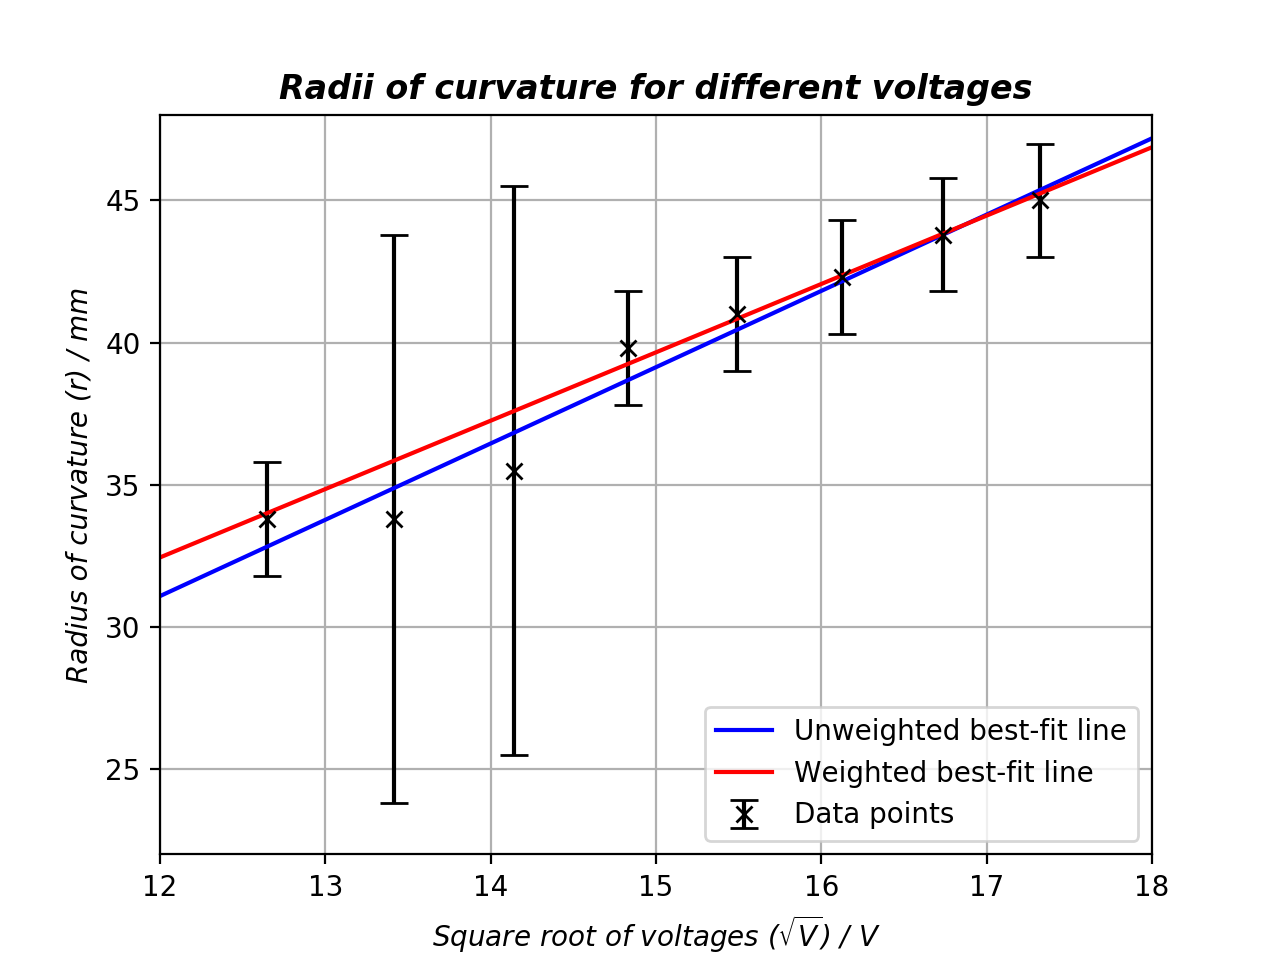

The value of the gradient (g) for the line plotted using unweighted squares fit is 2.68366818589 mm/V and the uncertainty in the value of g is 0.223729727545 mm/V.
The value of the y-intercept (c) for the same line is -1.11826831366 mm and the uncertainty in the value of c is 3.39302931421 mm.
The value of the gradient (g) for the line plotted using weighted least squares fit is 2.40464507514 mm/V and the uncertainty in the value of g is 0.533651140173 mm/V.
The value of the y-intercept (c) for the same is 3.58956688078 mm and the uncertainty in the value of c is 8.31248938794 mm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# import data
V, r, dr = np.loadtxt("eovermdata2017.csv", delimiter = ',', unpack = True)

# define points for the axes
xdata = np.sqrt(V) # points of the x-axis
ydata = r*1000 # points of the y-axis
yerror = dr*1000 # range of error bars

### Unweighted squares fit calculations (blue line) ###
x_mean = np.mean(xdata) 
y_mean = np.mean(ydata)

g1 = np.sum((xdata - x_mean)*ydata / np.sum((xdata - x_mean)*xdata)) # gradient, g1, of the line of best fit 
c1 = y_mean - g1*x_mean # y-intercept, c1, of the line of best fit

n = len(xdata) # number of data
squaresum = np.sum((ydata - g1*xdata - c1)**2) # residual d_i
D = np.sum((xdata - x_mean)**2) # deviation

error_g1 = np.sqrt( (1/D) * (squaresum / (n - 2)) ) # uncertainty in the gradient
error_c1 = np.sqrt(( (1/n) + x_mean**2 / D) * ((squaresum) / (n-2)) ) # uncertainty in the y-intercept 

x_max = np.max(xdata)
xpoints = np.linspace(0,x_max*1.5,2) # xpoints for the line of best fit
y1points = g1*xpoints + c1 # ypoints for the line of best fit

### Weighted squares fit calculations (red line) ###
w_i = 1 / (yerror)**2
w_ix_i = w_i*xdata
w_ix_i2 = w_i*(xdata)**2
w_iy_i = w_i*ydata
w_ix_iy_i = w_i*xdata*ydata

delta = np.sum(w_i)*np.sum(w_ix_i2) - (np.sum(w_ix_i))**2 # denominator

g2 = (np.sum(w_i)*np.sum(w_ix_iy_i) - np.sum(w_ix_i)*np.sum(w_iy_i)) / delta # gradient, g2, of the line of best fit
c2 = (np.sum(w_ix_i2)*np.sum(w_iy_i) - np.sum(w_ix_i)*np.sum(w_ix_iy_i)) / delta # uncertainty, c2, of the line of the best fit

error_g2 = np.sqrt(np.sum(w_i)/delta) # uncertainty in the gradient
error_c2 = np.sqrt(np.sum(w_ix_i2)/delta) # uncertainty in the y-intercept

y2points = g2*xpoints + c2 # ypoints for the weighted line of best fit

# plotting the graph
plt.figure()
plt.grid(True) 
plt.plot(xpoints, y1points, 'b-', label = "Unweighted best-fit line")  
plt.plot(xpoints, y2points, 'r-', label = "Weighted best-fit line")
plt.errorbar(xdata,ydata,yerr = yerror, fmt='kx', capsize=5, label = "Data points") 
plt.xlim(12, 18) # range of x-axis
plt.ylim(22, 48) # range of y-axis
plt.title('Radii of curvature for different voltages', fontweight = 'bold', fontstyle = 'italic')   
plt.xlabel('Square root of voltages ($\sqrt{V}$) / V', fontstyle = 'italic')
plt.ylabel('Radius of curvature (r) / mm', fontstyle = 'italic')
plt.legend(loc = 'best')

print("The value of the gradient (g) for the line plotted using unweighted squares fit is", g1, "mm/V and the uncertainty in the value of g is", error_g1, "mm/V.")
print("The value of the y-intercept (c) for the same line is", c1, "mm and the uncertainty in the value of c is", error_c1, "mm.")
print("The value of the gradient (g) for the line plotted using weighted least squares fit is", g2, "mm/V and the uncertainty in the value of g is", error_g2, "mm/V.")
print("The value of the y-intercept (c) for the same is", c2, "mm and the uncertainty in the value of c is", error_c2, "mm.")

## Equations for the lines of best-fit
### Equation for the unweighted best-fit line
The equation for the best-fit line obtained using unweighted least square fit is:

$$ r = 2.7\sqrt{V} - 1 $$

### Equation for the weighted best-fit line
The equation for the best-fit line obtained using weighted least square fit is: 

$$ r = 2.4\sqrt{V} + 4 $$

## Calculating e/m for both lines
As mentioned above e/m is given by: 

$$ \frac{e}{m} = \frac{2}{g^2B^2} $$
,where g is the gradient of the lines.

### Uncertainty in e/m                      
                                                                                       
The uncertainties in g and B are calculated seperately and propagated using the following equations in order to calculate the total uncertainty in the value of e/m. [3]

**Uncertainty in $g^2$:**
$$ \frac{\Delta{g^2}}{g^2} = 2\frac{\Delta{g}}{g} $$

**Uncertainty in $B^2$:**
$$ \frac{\Delta{B^2}}{B^2} = 2\frac{\Delta{B}}{B} $$

**Uncertainty in $g^2B^2$:**
$$ \Delta{(g^2B^2)} = g^2B^2 \sqrt{\Bigg(\frac{\Delta{g^2}}{g^2}\Bigg)^2 + \Bigg(\frac{\Delta{B^2}}{B^2}\Bigg)^2} $$

**Total uncertainty:**
$$ \Delta{\frac{e}{m}} = \Delta{(g^2B^2)} $$


### e/m for unweighted line of best fit
The charge-to-mass ratio for the unweighted line (blue line) is:

In [2]:
# e/m calculations
B = 1.28/1000 # magnetic field strength
baseg1 = g1/1000 # g1 in meters (base unit)
denominator1 = (baseg1**2)*(B**2) # denominator g^2*B^2

eoverm1 = (2/denominator1)

# uncertainty calculations
error_B = 0.01/1000 # uncertainty in B
baseerror_g1 = error_g1/1000 # uncertainty in g1 in meters
error_sqrB = 2*(error_B/B) # uncertainty in B squared
error_sqrg1 = 2*(error_g1/g1) # uncertainty in g squared
totalerror1 = 2 / denominator1 * np.sqrt((error_sqrB**2)+(error_sqrg1**2)) # total uncertainty

print("e/m = ", eoverm1, "C/kg")
print("Therefore, the e/m in standard form for the unweighted line of best fit is", eoverm1*1e-11, "x 10^11 C/kg.")
print("The uncertainty in the value of e/m for the unweighted line of best fit is", totalerror1/(10**11), "C/kg.")

e/m =  169493255281.0 C/kg
Therefore, the e/m in standard form for the unweighted line of best fit is 1.69493255281 x 10^11 C/kg.
The uncertainty in the value of e/m for the unweighted line of best fit is 0.283841531244 C/kg.


### e/m for weighted line of best fit
The charge-to-mass ratio for the weighted line (red line) is:

In [3]:
# e/m calculations
baseg2 = g2/1000 # gradient in meters (base unit)
denominator2 = (baseg2**2)*(B**2) # denominator g^2*B^2

eoverm2 = (2/denominator2)

# uncertainty calculations
baseerror_g2 = error_g2/1000 # uncertainty in g2 in meters
error_sqrg2 = 2*(baseerror_g2/baseg2) # uncertainty in g squared
totalerror2 = 2 / denominator2 * np.sqrt((error_sqrB**2)+(error_sqrg2**2)) # total uncertainty

print("e/m = ", eoverm2, "C/kg")
print("Therefore, the e/m in standard form for the unweighted line of best fit is", eoverm2*1e-11, "x 10^11 C/kg.")
print("The uncertainty in the value of e/m for the unweighted line of best fit is", totalerror2/(10**11), "C/kg.")


e/m =  211109651566.0 C/kg
Therefore, the e/m in standard form for the unweighted line of best fit is 2.11109651566 x 10^11 C/kg.
The uncertainty in the value of e/m for the unweighted line of best fit is 0.93759110986 C/kg.


## Conclusion

The **accepted value** of charge-mass ratio (e/m) for an electron is: 

$$(1.75882002 \pm 0.00000001) \times 10^{11} C/kg $$

e/m for **unweighted** line of best fit is:

$$ (1.7 \pm 0.3) \times 10^{11} C/kg $$

e/m for **weighted** line of best fit is:

$$ (2.1 \pm 0.9) \times 10^{11} C/kg $$

The e/m value for the unweighted line is closer to the accepted value than the weighted line. Therefore, unweighted least-squares fit gave a **more accurate** result for charge-mass ratio of an electron. Furthermore, the percentage uncertainty in the value of e/m for unweighted line is less, thus it is **more reliable** than the value for weighted line.

## References
**[1]** Dash, L. (2017). PHAS1240 Reading Week task 2017: Using a weighted fit to calculate e/m. p.2

**[2]** Dash, L. (2017). Equations for the Reading Week Task. p.1.

**[3]** Skipper, N., Jones, P., Bartlett, P., Grozier, J. and Dunnett, K. (2015). PHAS1240 Experimental Methods and Data Analysis. 3rd ed. UCL Department of Physics and Astronomy, p.11.